# Stroke Prediction 

A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


Dataset Link https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [113]:
## Data Analysis Phase
## Main aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [114]:
df = pd.read_csv("healthcare-stroke-data.csv")

In [115]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [116]:
df.drop('id', axis= 1, inplace = True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [118]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [119]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [120]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [121]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [122]:
import missingno as ms

<AxesSubplot:>

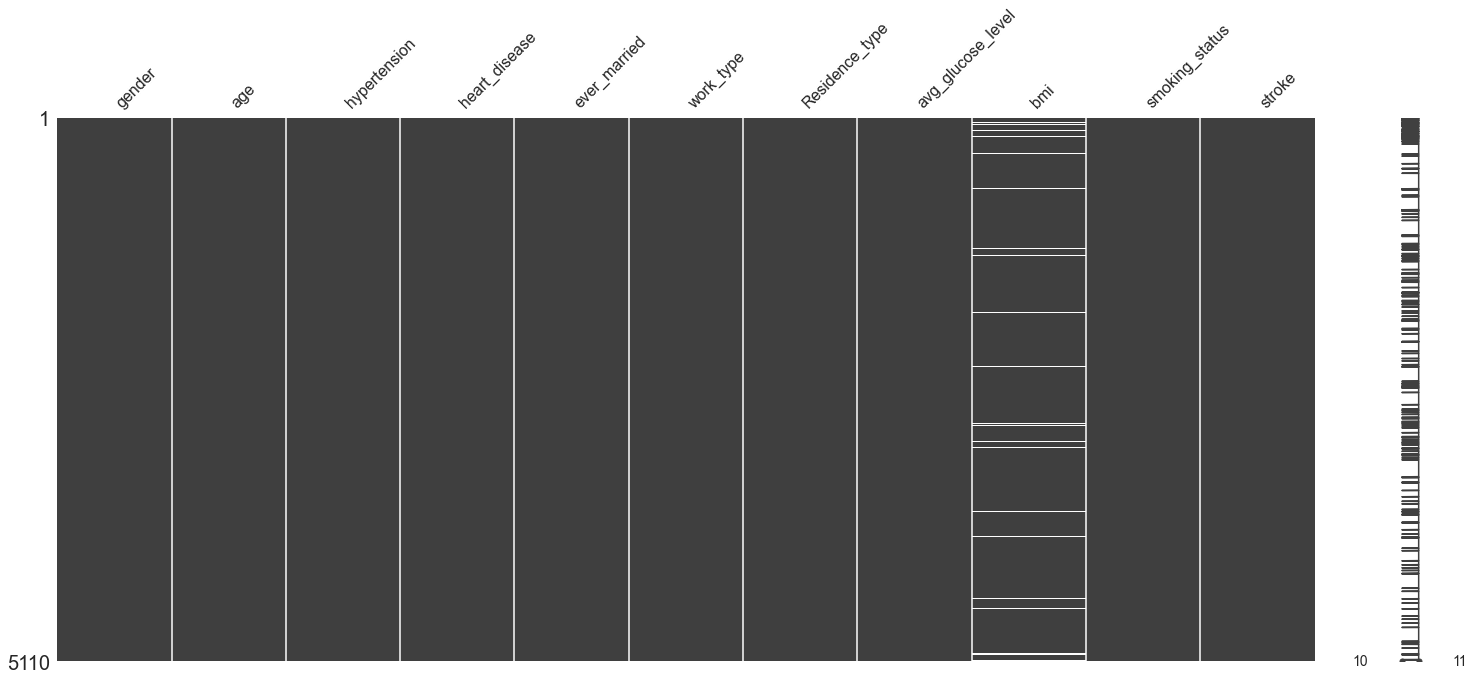

In [123]:
ms.matrix(df)

In [124]:
print(df['bmi'].mean())
print(df['bmi'].median())

28.893236911794673
28.1


In [125]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [126]:
df['bmi'].median()

28.1

<AxesSubplot:>

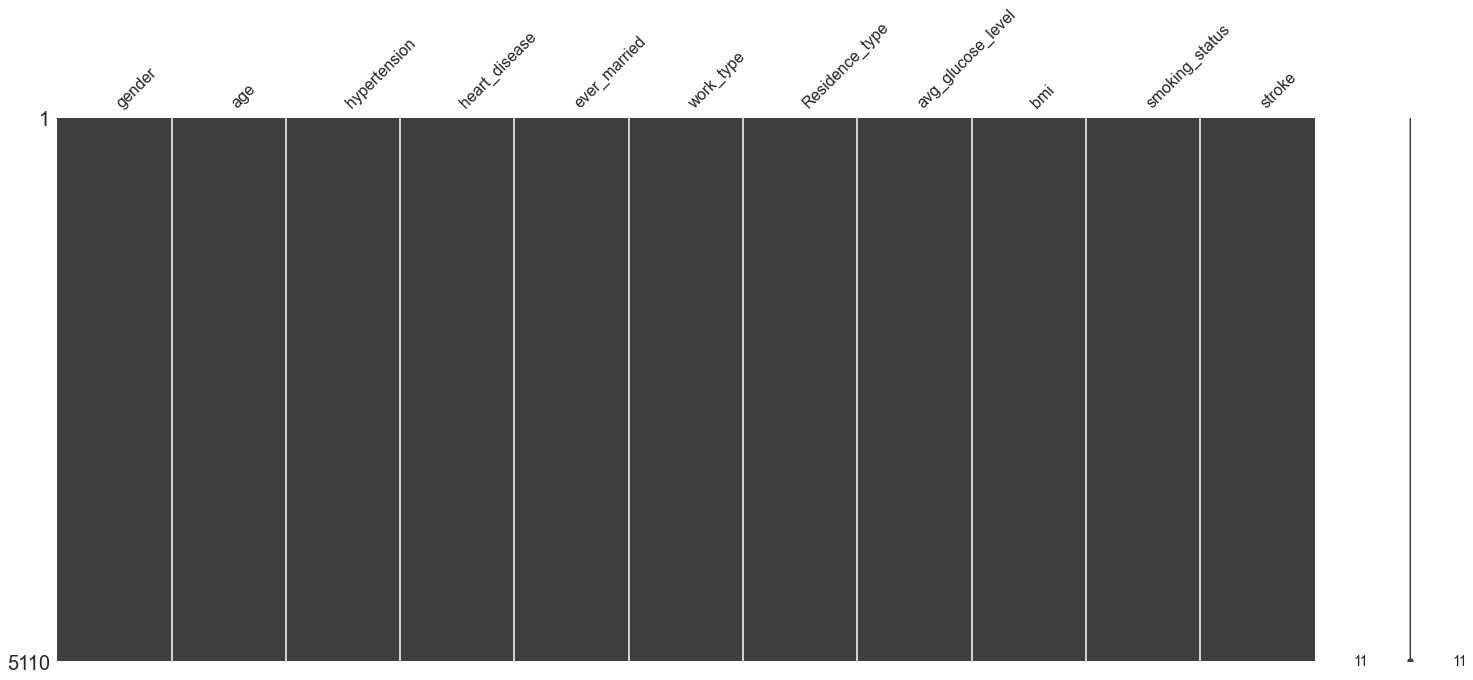

In [127]:
ms.matrix(df)

In [128]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [129]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [130]:
# Are there any duplicate rows in the dataframe? Let's check it!

duplicated = len(df[df.duplicated()])
print(f'There ara {duplicated} duplicated rows')

There ara 0 duplicated rows


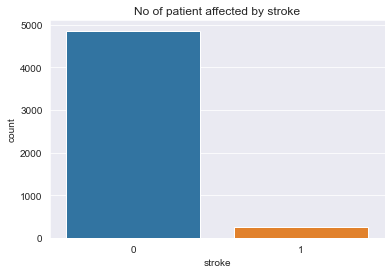

In [131]:
sns.countplot(x=df['stroke'])
plt.title('No of patient affected by stroke')
plt.show()

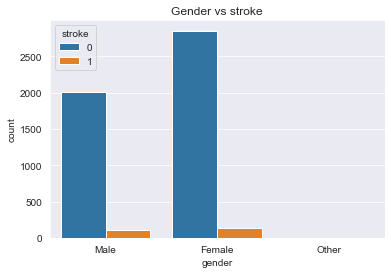

In [132]:
sns.countplot(x=df['gender'],hue = df['stroke'])
plt.title('Gender vs stroke')
plt.show()

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

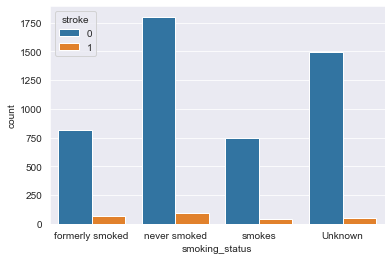

In [133]:
sns.countplot(x=df['smoking_status'],hue = df['stroke'])

In [134]:
#df.groupby(df['smoking_status'](df['gender']).plot

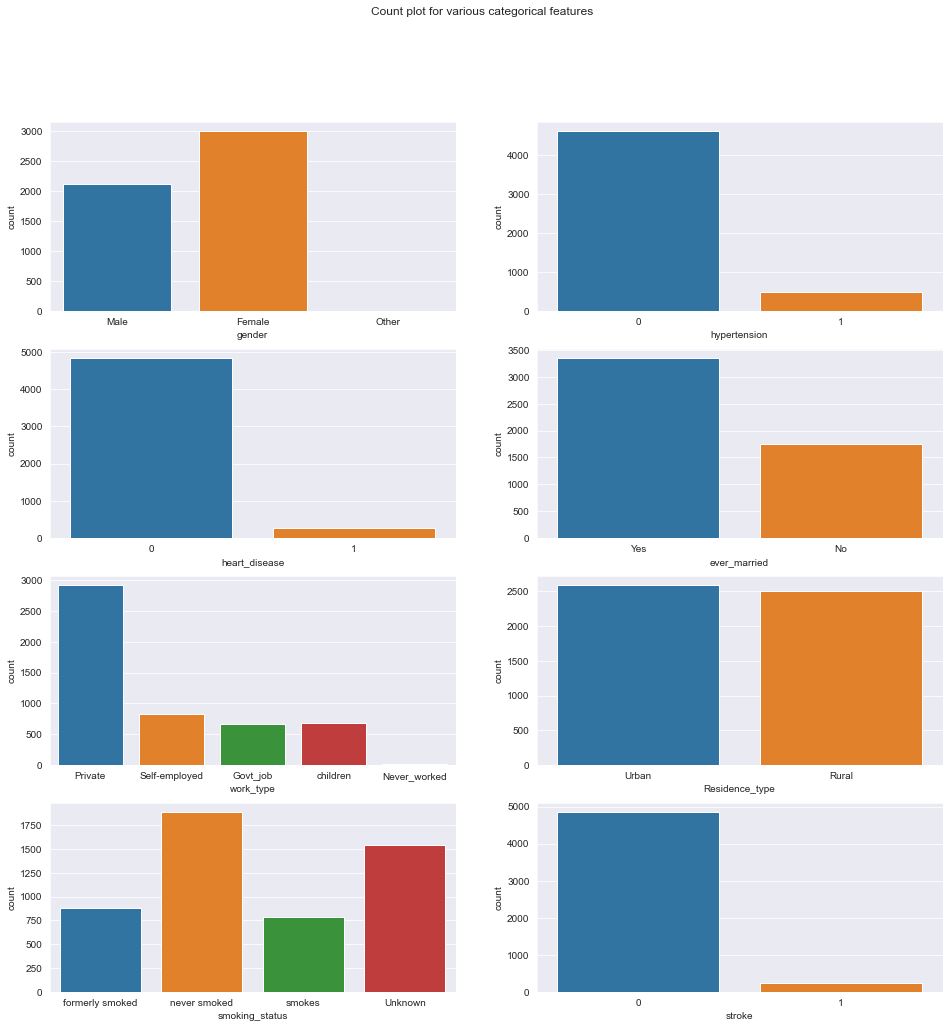

In [135]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('darkgrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

plt.show()

In [136]:
str_data = df.select_dtypes(include='O')

In [137]:
str_data.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [138]:
num_df = df.select_dtypes(exclude='O')

In [139]:
num_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.1,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


In [140]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [141]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)
df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

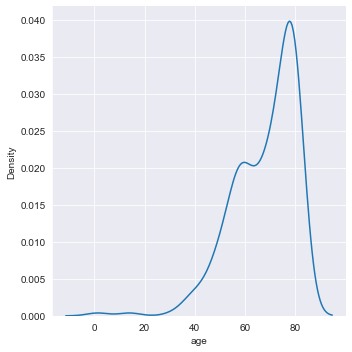

In [142]:
stroke = df[df['stroke']==1]
sns.displot(stroke.age, kind="kde")
plt.show()

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWar

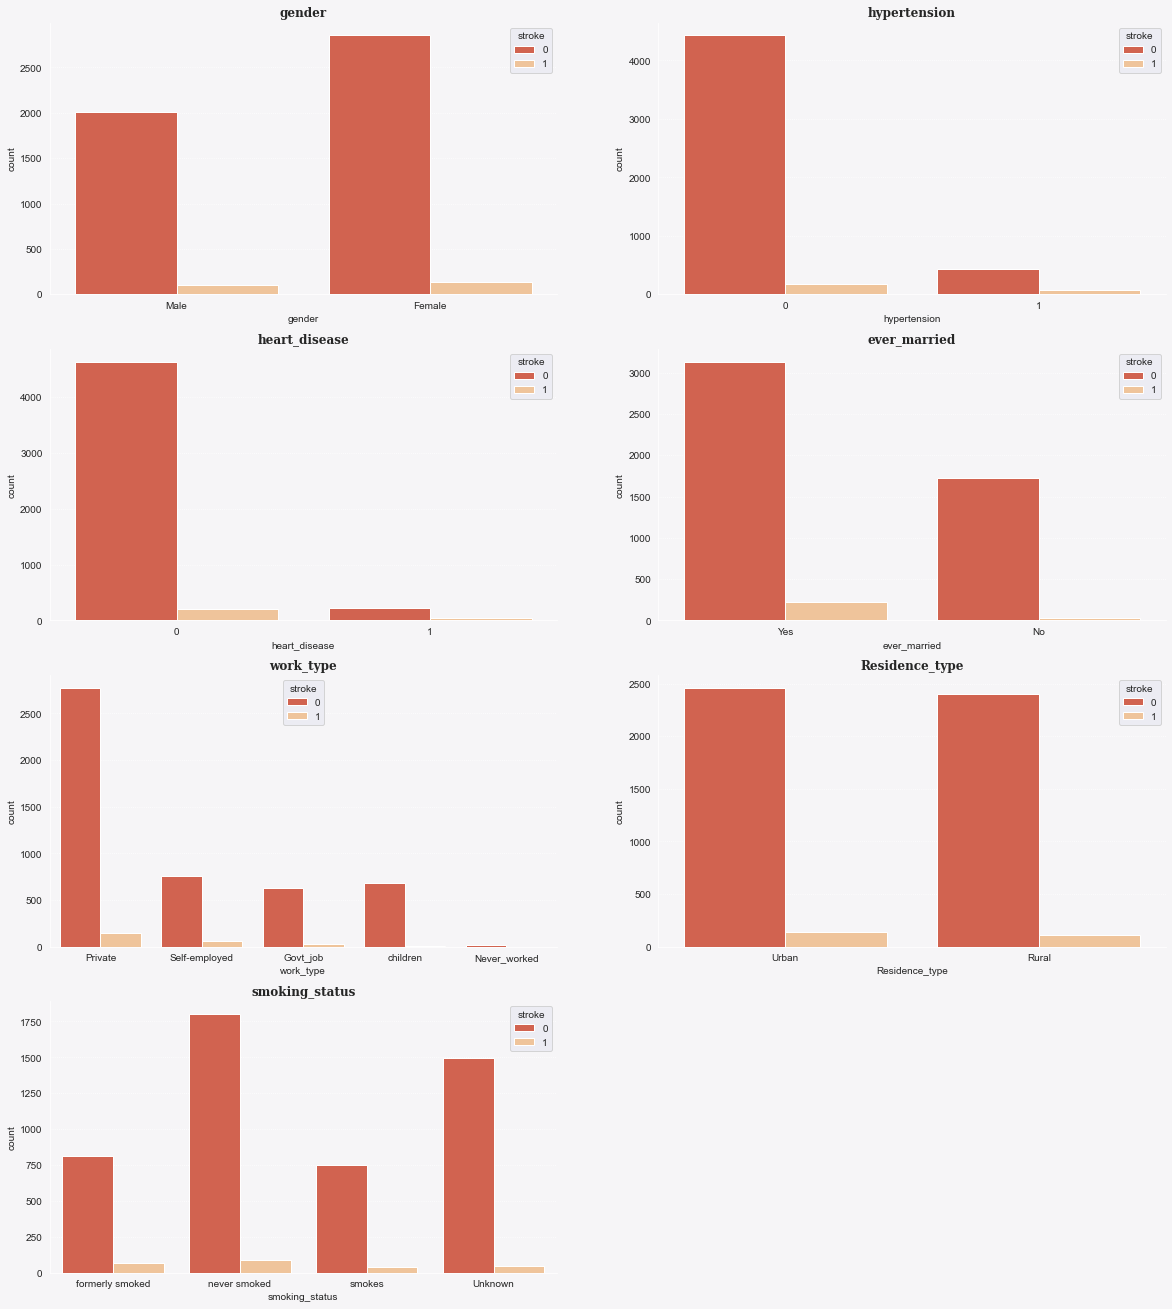

In [143]:
data_cat=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status']]
fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_cat.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_cat[val],palette='OrRd_r',hue=df['stroke'])


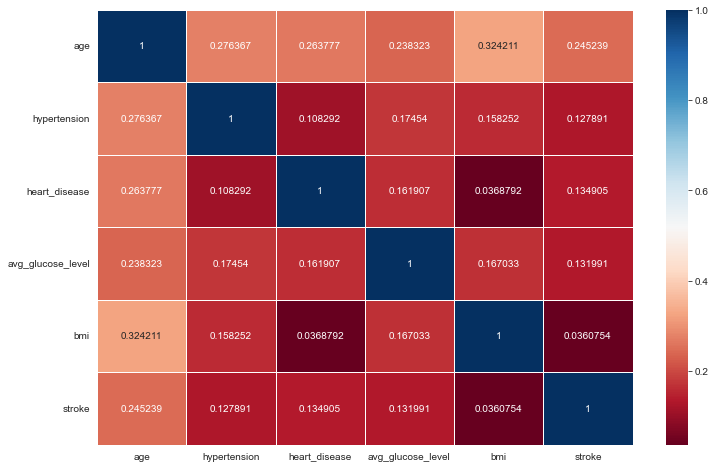

In [144]:
fig = plt.figure(figsize=(12,8))
corr = df.corr()
ax = sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")

# Data Preprocesing

In [145]:
print(f'Age Variable min: {df["age"].min()}')
print(f'Age Variable max: {df["age"].max()}')
print(f'Age Variable: {df["age"].nunique()}')

Age Variable min: 0.08
Age Variable max: 82.0
Age Variable: 104


In [146]:
df['age_cat'] = pd.cut(df['age'], bins=[0, 13, 18, 45, 60, 100], labels=['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'])

In [147]:
df['age_cat'].unique()

['Elderly', 'Mid Adults', 'Adults', 'Children', 'Teens']
Categories (5, object): ['Children' < 'Teens' < 'Adults' < 'Mid Adults' < 'Elderly']

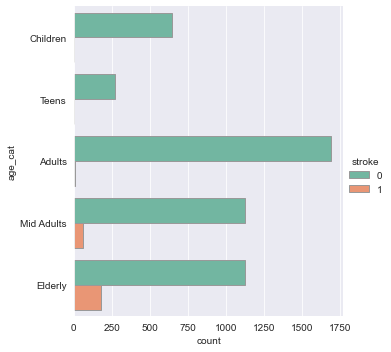

In [148]:
sns.catplot(y="age_cat", hue="stroke", kind="count",
            palette="Set2", edgecolor=".6",
            data=df)

In [149]:
print(f'BMI Variable min: {df["bmi"].min()}')
print(f'BMI Variable max: {df["bmi"].max()}')
print(f'BMI Variable: {df["bmi"].nunique()}')

BMI Variable min: 10.3
BMI Variable max: 97.6
BMI Variable: 418


In [150]:
df['bmi_cat'] = pd.cut(df['bmi'], bins=[0, 19, 25, 30, 100], labels=['Underweight', 'Ideal', 'Overweight', 'Obesity'])

In [151]:
df['bmi_cat'].unique()

['Obesity', 'Overweight', 'Ideal', 'Underweight']
Categories (4, object): ['Underweight' < 'Ideal' < 'Overweight' < 'Obesity']

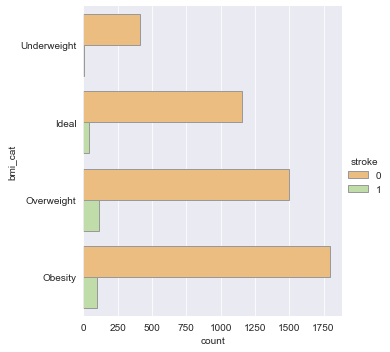

In [152]:
sns.catplot(y="bmi_cat", hue="stroke", kind="count",
            palette="Spectral", edgecolor=".6",
            data=df)

In [153]:
print(f'Glucose Variable min: {df["avg_glucose_level"].min()}')
print(f'Glucose Variable max: {df["avg_glucose_level"].max()}')
print(f'Glucose Variable: {df["avg_glucose_level"].nunique()}')

Glucose Variable min: 55.12
Glucose Variable max: 271.74
Glucose Variable: 3978


In [154]:
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins=[0, 90, 160, 230, 300], labels=['Low', 'Normal', 'High', 'Very High'])

In [155]:
df['glucose_cat'].unique()

['High', 'Normal', 'Low', 'Very High']
Categories (4, object): ['Low' < 'Normal' < 'High' < 'Very High']

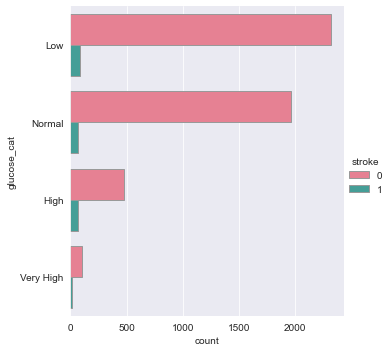

In [156]:
sns.catplot(y="glucose_cat", hue="stroke", kind="count",
            palette="husl", edgecolor=".6",
            data=df)

In [157]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat,bmi_cat,glucose_cat
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elderly,Obesity,High
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Elderly,Overweight,High
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elderly,Obesity,Normal
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Mid Adults,Obesity,High
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elderly,Ideal,High


# Encoding Techniques

In [158]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [159]:
binary_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'stroke']

In [160]:
from sklearn.preprocessing import LabelEncoder

In [161]:
for col in binary_cols:
    label_encoder(df, col)

In [50]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat,bmi_cat,glucose_cat
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,Elderly,Obesity,High
1,0,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1,Elderly,Overweight,High
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,Elderly,Obesity,Normal
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,Mid Adults,Obesity,High
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,Elderly,Ideal,High


In [51]:
labelencoder = LabelEncoder()

In [52]:
df["age_cat"] = labelencoder.fit_transform(df["age_cat"])
df["bmi_cat"] = labelencoder.fit_transform(df["bmi_cat"])
df["glucose_cat"] = labelencoder.fit_transform(df["glucose_cat"])

In [53]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat,bmi_cat,glucose_cat
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,2,1,0
1,0,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1,2,2,0
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,2,1,2
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,3,1,0
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,2,0,0


In [54]:
df = pd.get_dummies(df, columns = ['work_type', 'smoking_status'], drop_first = True)

In [55]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_cat,bmi_cat,glucose_cat,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,2,1,0,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.1,1,2,2,0,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,2,1,2,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,3,1,0,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,2,0,0,0,0,1,0,0,1,0


In [56]:
from sklearn.preprocessing import RobustScaler

In [57]:
# Let's scaling with RobustScaler

cols = ["age", "avg_glucose_level", "bmi"]

for col in cols:
    df[col] = RobustScaler().fit_transform(df[[col]])

In [58]:
df.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_cat,bmi_cat,glucose_cat,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.611111,0,1,1,1,3.712619,0.944444,1,2,1,0,0,1,0,0,1,0,0
1,0,0.444444,0,0,1,0,2.994030,0.000000,1,2,2,0,0,0,1,0,0,1,0
2,1,0.972222,0,1,1,0,0.381004,0.488889,1,2,1,2,0,1,0,0,0,1,0
3,0,0.111111,0,0,1,1,2.153324,0.700000,1,3,1,0,0,1,0,0,0,0,1
4,0,0.944444,1,0,1,0,2.231750,-0.455556,1,2,0,0,0,0,1,0,0,1,0


# Model

In [59]:
# target and independent variables:

y = df["stroke"]
X = df.drop(["stroke"], axis=1)

In [60]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [61]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_cat,bmi_cat,glucose_cat,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4779,0,0.361111,0,0,1,1,-0.683039,2.622222,3,1,1,0,0,1,0,0,1,0
920,0,-0.666667,0,0,0,1,0.535414,0.977778,0,1,2,0,0,0,0,0,0,1
4224,0,0.138889,0,0,1,1,0.321303,0.811111,3,1,2,0,1,0,0,1,0,0
1044,0,0.944444,0,0,1,1,0.054545,0.255556,2,1,2,0,0,0,0,0,1,0
3836,1,-1.166667,0,0,0,1,0.365265,-1.400000,1,3,2,0,0,0,1,0,0,0


# Naive Bayes Model

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)

GaussianNB()

In [64]:
pred = gnb_model.predict(X_test)
pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [104]:
acc = accuracy_score(y_test,pred)
print('accracy:',acc)

accracy: 0.9386823222439661


In [105]:
test_score = gnb_model.score(X_test,y_test)

In [106]:
print("GNB score:",test_score)

GNB score: 0.547945205479452


# KNN Model

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [69]:
pred = knn_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
knn_test_score = knn_model.score(X_test,y_test)

In [107]:
acc = accuracy_score(y_test,y_pred)
print('accracy:',acc)

accracy: 0.9386823222439661


In [71]:
print("knn score:",knn_test_score)

knn score: 0.9386823222439661


In [72]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1446
           1       0.11      0.01      0.02        87

    accuracy                           0.94      1533
   macro avg       0.53      0.50      0.49      1533
weighted avg       0.90      0.94      0.91      1533



In [74]:
from sklearn.model_selection import cross_validate

In [98]:
cv_results = cross_validate(knn_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])


In [76]:
print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())
print("test_roc_auc: ", cv_results['test_roc_auc'].mean())

test_accuracy:  0.9461734112023246
test_f1:  0.02106537530266344
test_roc_auc:  0.633203199798438


# Decision Tree Model

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dt_model = DecisionTreeClassifier().fit(X_train,y_train)

In [94]:
ydt_pred = dt_model.predict(X_test)
ydt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
dt_score = dt_model.score(X_test,y_test)
dt_score

0.9145466405740378

In [108]:
acc = accuracy_score(y_test,ydt_pred)
print('accracy:',acc)

accracy: 0.9145466405740378


In [109]:
print(classification_report(y_test, ydt_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1446
           1       0.19      0.16      0.18        87

    accuracy                           0.91      1533
   macro avg       0.57      0.56      0.57      1533
weighted avg       0.91      0.91      0.91      1533



In [110]:
cv1_results = cross_validate(dt_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])


In [111]:
print("test_accuracy: ", cv1_results['test_accuracy'].mean())
print("test_f1: ", cv1_results['test_f1'].mean())
print("test_roc_auc: ", cv1_results['test_roc_auc'].mean())

test_accuracy:  0.9142696140348188
test_f1:  0.18381995636587134
test_roc_auc:  0.5755747879398674


# Random Forest Model

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [84]:
yrf_pred = rf_model.predict(X_test)
yrf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
rf_score = rf_model.score(X_test,y_test)
rf_score

0.9419439008480104

In [86]:
print(classification_report(y_test, yrf_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1446
           1       0.25      0.01      0.02        87

    accuracy                           0.94      1533
   macro avg       0.60      0.50      0.50      1533
weighted avg       0.90      0.94      0.92      1533



In [101]:
cv2_results = cross_validate(rf_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])


In [102]:
print("test_accuracy: ", cv2_results['test_accuracy'].mean())
print("test_f1: ", cv2_results['test_f1'].mean())
print("test_roc_auc: ", cv2_results['test_roc_auc'].mean())

test_accuracy:  0.9498925691592028
test_f1:  0.029510489510489513
test_roc_auc:  0.8076518014613253


*Imported Libraries and Read Stroke Dataset
*Explorary Data Analysis : We defined a function to grab the categorical and numerical variables of its dataset.
*Visualization of data: Categorical variables and correlation visualization
*Data Preprocessing : We filled missing values of some variables with median values.
*Featured Engineering: We created new feature interactions for categorical variables.
*Encoding: Binary, label and one-hot-encoding was implemented for categorical variables.
*Modeling: We created ML model for the dataset. The accuracy score was calculated the machine learning model is RandomForestClassifier.